# Module 1: Neural Networks, Bayesian Deep Learning & Reinforcement Learning

## Part 1: From Biological to Artificial

### The Biological Neuron

**Components:**
- **Dendrites**: Receive signals from other neurons
- **Cell body**: Processes incoming signals
- **Axon**: Sends output signal to other neurons
- **Synapses**: Connection points with varying strengths

### The Artificial Neuron (Perceptron)

**Mathematical model:**

$$ output = activation\left(\sum_i^n(weight_i × input_i) + bias\right) $$


**Components:**
- **Inputs (x₁, x₂, ..., xₙ)**: Thr data features
- **Weights (w₁, w₂, ..., wₙ)**: Learned parameters (like synapse strengths)
- **Bias (b)**: Learned offset parameter
- **Activation function**: Non-linear transformation (like neuron firing threshold)

**Example**\
Risk assessment neuron:

$x_1$ = debt_ratio (0.3)\
$x_2$ = income_stability (0.8)\
$x_3$ = credit_score (0.7)

$w_1$ = 0.5, $w_2$ = -0.3, $w_3$ = -0.4, b = 0.1

z = 0.5 $\times$ 0.3 + (-0.3) $\times$ 0.8 + (-0.4)×0.7 + 0.1 = -0.27\
output = sigmoid(-0.27) = 0.43 (43% risk)

## Part 3: Building Networks - Architecture Matters

### Single Layer (Perceptron)

**Limitation**: Can only learn linearly separable patterns.

**Example problem it CAN solve**: OR gate

Input: (0,0) → Output: 0\
Input: (0,1) → Output: 1  
Input: (1,0) → Output: 1\
Input: (1,1) → Output: 1

For OR gate: We can find weights like $w_1$ =1, $w_2$=1, bias=-0.5

- (0,0): 1×0 + 1×0 - 0.5 = -0.5 → sigmoid(-0.5) ≈ 0.38 → rounds to 0 
- (0,1): 1×0 + 1×1 - 0.5 = 0.5 → sigmoid(0.5) ≈ 0.62 → rounds to 1 ✓
- (1,0): 1×1 + 1×0 - 0.5 = 0.5 → sigmoid(0.5) ≈ 0.62 → rounds to 1 ✓
- (1,1): 1×1 + 1×1 - 0.5 = 1.5 → sigmoid(1.5) ≈ 0.82 → rounds to 1 ✓


**Problem it CANNOT solve**: XOR gate

Input: (0,0) → Output: 0\
Input: (0,1) → Output: 1\
Input: (1,0) → Output: 1\ 
Input: (1,1) → Output: 0

For XOR gate: No combination of $w_1$, $w_2$ and bias can work because we need a curved or multiple-line boundary.


### Multi-Layer Networks (MLPs)

**Architecture:**

Input Layer → Hidden Layer(s) → Output Layer


**Universal Approximation Theorem**: A neural network with:
- At least one hidden layer
- Sufficient neurons
- Non-linear activation functions

Can approximate ANY continuous function to arbitrary precision!


## Part 3: Activation Functions - The Non-Linear Magic

### Why Non-Linearity Matters

**Without activation functions**: Neural network = linear regression (no matter how many layers!)

**With activation functions**: Neural network = universal function approximator

### Common Activation Functions

**1. Sigmoid: $\sigma$(x) = 1/(1 + e^(-x))**

📊 CHARACTERISTICS:
• Range: (0, 1) - always positive
• Shape: S-curve, smooth transitions
• Derivative: σ(x) × (1 - σ(x))

✅ ADVANTAGES:
• Perfect for binary classification output
• Gives probabilistic interpretation
• Smooth, differentiable everywhere
• Historically well-understood

❌ DISADVANTAGES:
• VANISHING GRADIENT PROBLEM: derivatives near 0 for |x| > 3
• Not zero-centered: all outputs positive
• Computationally expensive (exponential)
• Slow convergence in deep networks

💼 WHEN TO USE:
• OUTPUT layer for binary classification
• Probability estimation (risk assessment)
• Gate mechanisms in LSTM/GRU
• Legacy systems requiring sigmoid compatibility

🚫 AVOID FOR:
• Hidden layers in deep networks
• High-speed trading systems
• Networks with many layers (>3-4)

**2. Tanh: tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))**

📊 CHARACTERISTICS:
• Range: (-1, 1) - zero-centered
• Shape: S-curve, steeper than sigmoid
• Derivative: 1 - tanh²(x)

✅ ADVANTAGES:
• Zero-centered output (faster convergence)
• Stronger gradients than sigmoid
• Symmetric around origin
• Good for normalized data

❌ DISADVANTAGES:
• Still suffers from vanishing gradients
• Computationally expensive
• Saturation issues for extreme inputs
• Not as fast as modern alternatives

💼 WHEN TO USE:
• OUTPUT layer for classification with negative values
• Trading signals (-1 = sell, +1 = buy)
• Hidden layers (better than sigmoid)
• LSTM/GRU internal computations


**3. ReLU: ReLU(x) = max(0, x)**

📊 CHARACTERISTICS:
• Range: [0, ∞) - unlimited positive
• Shape: Linear for x > 0, zero for x ≤ 0
• Derivative: 1 if x > 0, 0 if x ≤ 0

✅ ADVANTAGES:
• NO vanishing gradient problem
• Computationally very efficient
• Sparse activation (many zeros)
• Simple and effective
• Fast convergence
• Biological plausibility

❌ DISADVANTAGES:
• DEAD NEURON PROBLEM: neurons can get stuck at zero
• Not zero-centered
• Not differentiable at x = 0
• Can cause exploding gradients

💼 WHEN TO USE:
• HIDDEN layers in deep networks
• Computer vision tasks
• High-speed applications
• Default choice for most architectures
• When training speed is critical

🚫 AVOID FOR:
• Output layers (usually need bounded output)
• Very deep networks without batch norm
• When all features are negative


**4. Leaky ReLU: LeakyReLU(x) = max($\alpha$ x, x) where $\alpha$ ≈ 0.01**

📊 CHARACTERISTICS:
• Range: (-∞, ∞) - small negative slope
• Shape: Linear with small negative gradient
• Derivative: 1 if x > 0, α if x ≤ 0

✅ ADVANTAGES:
• Solves dead neuron problem
• Allows negative information flow
• Still computationally efficient
• No vanishing gradients
• Better than standard ReLU

❌ DISADVANTAGES:
• Hyperparameter tuning (α value)
• Not zero-centered
• Arbitrary choice of α
• Slight computational overhead

💼 WHEN TO USE:
• Replace ReLU when dead neurons are a problem
• Deep networks with potential dying ReLU issue
• When negative activations carry information
• Experimental alternatives to ReLU

**5. ELU: ELU(x) = x if x > 0, α(e^x - 1) if x ≤ 0, 0.1 $\geq$ \alpha \leq 2.0**


📊 CHARACTERISTICS:
• Range: (-α, ∞) - bounded negative values
• Shape: Linear positive, exponential negative
• Smooth everywhere (differentiable)
• α controls the saturation level for negative inputs

✅ ADVANTAGES:
• Smooth function (better optimization)
• Mean activation closer to zero
• No dead neuron problem
• Robust to noise
• Self-normalizing properties

❌ DISADVANTAGES:
• Computationally expensive (exponential)
• Requires hyperparameter tuning (α)
• More complex than ReLU variants
• Slower training

💼 WHEN TO USE:
• When smoothness is important
• Noisy financial data
• Self-normalizing neural networks
• When computational cost is acceptable

**6. SWISH: Swish(x) = x × $\sigma$(x), where $\sigma$ (x) = sigmoid(x)**

📊 CHARACTERISTICS:
• Range: (~-0.28, ∞) - self-gated
• Shape: Smooth, self-gating mechanism
• Unbounded above, bounded below

✅ ADVANTAGES:
• Self-gating property
• Smooth and differentiable
• Often outperforms ReLU
• Good for complex patterns
• No hyperparameters

❌ DISADVANTAGES:
• More computationally expensive
• Less interpretable
• Newer, less tested
• Memory overhead

💼 WHEN TO USE:
• Complex pattern recognition
• Modern architectures
• When performance > speed
• Research and experimentation

**7. GELU: GELU(x) = x × $\Phi(x), Φ(x) is the CDF of standard normal**

📊 CHARACTERISTICS:
• Range: (-∞, ∞) - probabilistically motivated
• Shape: Smooth approximation to ReLU
• Based on Gaussian CDF

✅ ADVANTAGES:
• State-of-the-art in Transformers
• Smooth and differentiable
• Probabilistically motivated
• Excellent for NLP and sequential data

❌ DISADVANTAGES:
• Computationally complex
• Newer activation (less tested)
• Requires more memory

💼 WHEN TO USE:
• Transformer architectures
• Sequential financial data
• Time series prediction
• Modern deep learning research

### FINANCIAL USE CASES:

🏦 RISK MODELING:
• Output: Sigmoid (risk probability 0-1)
• Hidden: ReLU/ELU (fast training)

📈 TRADING SIGNALS:
• Output: Tanh (buy/sell: -1 to +1)
• Hidden: Swish (complex patterns)

💰 PORTFOLIO OPTIMIZATION:
• Hidden: GELU (Transformer-based)
• Output: Softmax (allocation %)

🎯 FRAUD DETECTION:
• Hidden: ReLU (sparse features)
• Output: Sigmoid (fraud probability)

⚡ HIGH-FREQUENCY TRADING:
• All layers: ReLU (speed critical)
• Avoid: Sigmoid/Tanh (too slow)

Complete Activation Functions with ALL Derivatives!


Text(0.5, 1.0, 'Numerical Comparison')

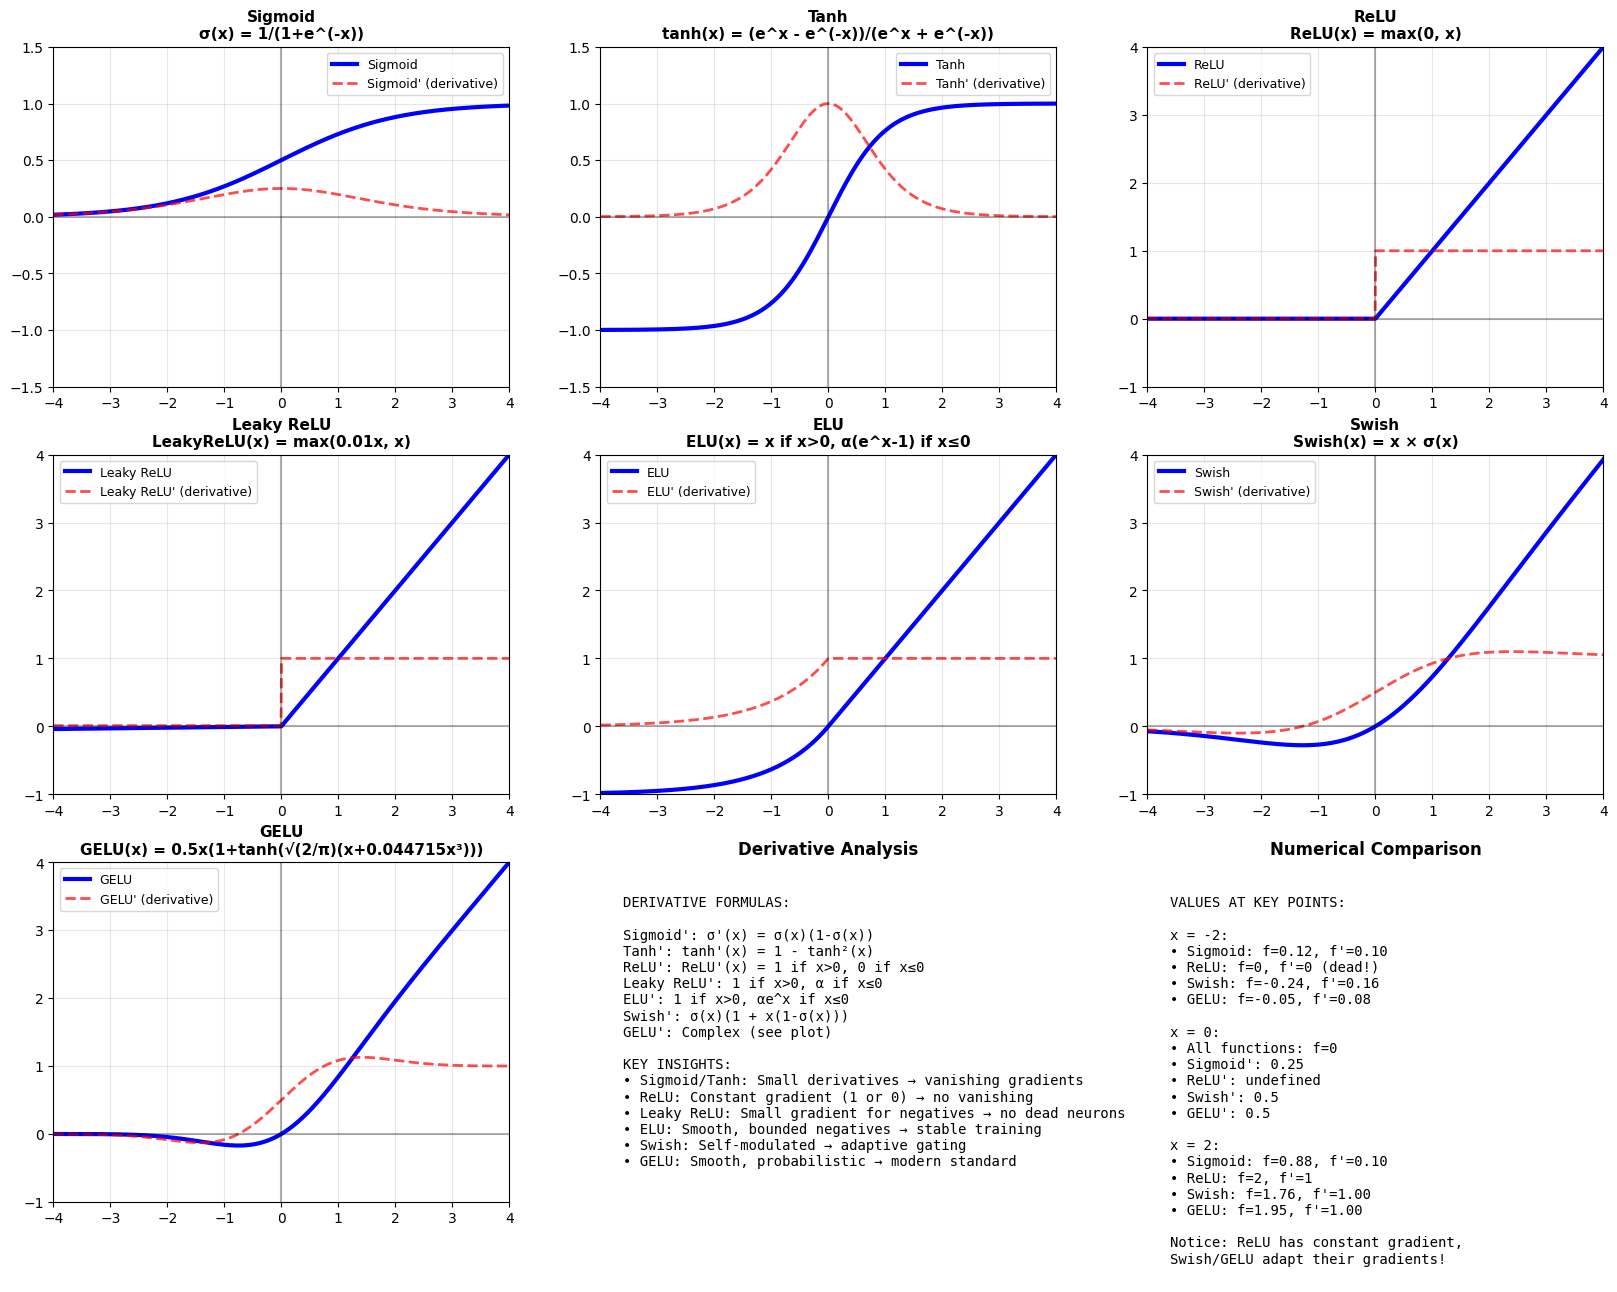

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Complete Activation Functions with ALL Derivatives!")

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

# ALL DERIVATIVES (including the missing ones!)
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu_derivative(x, alpha=1.0):
    """ELU derivative: 1 if x > 0, α*e^x if x ≤ 0"""
    return np.where(x > 0, 1, alpha * np.exp(x))

def swish_derivative(x):
    """Swish derivative: σ(x) + x*σ(x)*(1-σ(x)) = σ(x)*(1 + x*(1-σ(x)))"""
    s = sigmoid(x)
    return s * (1 + x * (1 - s))

def gelu_derivative(x):
    """GELU derivative using the tanh approximation"""
    # Constants
    sqrt_2_pi = np.sqrt(2/np.pi)
    coeff = 0.044715
    
    # Inner tanh argument
    tanh_arg = sqrt_2_pi * (x + coeff * x**3)
    tanh_val = np.tanh(tanh_arg)
    sech2_val = 1 - tanh_val**2  # sech²(x) = 1 - tanh²(x)
    
    # GELU'(x) = 0.5 * (1 + tanh(...)) + 0.5 * x * sech²(...) * √(2/π) * (1 + 3*0.044715*x²)
    return 0.5 * (1 + tanh_val) + 0.5 * x * sech2_val * sqrt_2_pi * (1 + 3 * coeff * x**2)

# Create visualization with ALL derivatives
x = np.linspace(-4, 4, 1000)

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Complete Activation Functions: Functions AND Derivatives', fontsize=18, fontweight='bold')

# All functions WITH their derivatives
functions = [
    (sigmoid, sigmoid_derivative, 'Sigmoid', 'σ(x) = 1/(1+e^(-x))'),
    (tanh, tanh_derivative, 'Tanh', 'tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))'),
    (relu, relu_derivative, 'ReLU', 'ReLU(x) = max(0, x)'),
    (leaky_relu, leaky_relu_derivative, 'Leaky ReLU', 'LeakyReLU(x) = max(0.01x, x)'),
    (elu, elu_derivative, 'ELU', 'ELU(x) = x if x>0, α(e^x-1) if x≤0'),
    (swish, swish_derivative, 'Swish', 'Swish(x) = x × σ(x)'),
    (gelu, gelu_derivative, 'GELU', 'GELU(x) = 0.5x(1+tanh(√(2/π)(x+0.044715x³)))'),
]

# Plot all 7 functions with their derivatives
for i, (func, deriv, name, formula) in enumerate(functions):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
    # Plot function
    y = func(x)
    ax.plot(x, y, 'b-', linewidth=3, label=f'{name}')
    
    # Plot derivative (NOW ALL HAVE DERIVATIVES!)
    y_deriv = deriv(x)
    ax.plot(x, y_deriv, 'r--', linewidth=2, alpha=0.7, label=f"{name}' (derivative)")
    
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.set_title(f'{name}\n{formula}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)
    ax.set_xlim(-4, 4)
    
    # Set appropriate y-limits for better visualization
    if name in ['ReLU', 'Leaky ReLU', 'ELU', 'Swish', 'GELU']:
        ax.set_ylim(-1, 4)
    else:
        ax.set_ylim(-1.5, 1.5)

# Use the remaining two subplots for comparison
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Add derivative formulas
derivative_info = """
DERIVATIVE FORMULAS:

Sigmoid': σ'(x) = σ(x)(1-σ(x))
Tanh': tanh'(x) = 1 - tanh²(x)
ReLU': ReLU'(x) = 1 if x>0, 0 if x≤0
Leaky ReLU': 1 if x>0, α if x≤0
ELU': 1 if x>0, αe^x if x≤0
Swish': σ(x)(1 + x(1-σ(x)))
GELU': Complex (see plot)

KEY INSIGHTS:
• Sigmoid/Tanh: Small derivatives → vanishing gradients
• ReLU: Constant gradient (1 or 0) → no vanishing
• Leaky ReLU: Small gradient for negatives → no dead neurons
• ELU: Smooth, bounded negatives → stable training
• Swish: Self-modulated → adaptive gating
• GELU: Smooth, probabilistic → modern standard
"""

axes[2, 1].text(0.05, 0.95, derivative_info, transform=axes[2, 1].transAxes, 
                fontsize=10, verticalalignment='top', fontfamily='monospace')
axes[2, 1].set_title('Derivative Analysis', fontsize=12, fontweight='bold')

# Add comparison at key points
comparison_info = """
VALUES AT KEY POINTS:

x = -2:
• Sigmoid: f=0.12, f'=0.10
• ReLU: f=0, f'=0 (dead!)
• Swish: f=-0.24, f'=0.16
• GELU: f=-0.05, f'=0.08

x = 0:
• All functions: f=0
• Sigmoid': 0.25
• ReLU': undefined
• Swish': 0.5
• GELU': 0.5

x = 2:
• Sigmoid: f=0.88, f'=0.10
• ReLU: f=2, f'=1
• Swish: f=1.76, f'=1.00
• GELU: f=1.95, f'=1.00

Notice: ReLU has constant gradient,
Swish/GELU adapt their gradients!
"""

axes[2, 2].text(0.05, 0.95, comparison_info, transform=axes[2, 2].transAxes, 
                fontsize=10, verticalalignment='top', fontfamily='monospace')
axes[2, 2].set_title('Numerical Comparison', fontsize=12, fontweight='bold')

## Part 5: The Learning Process - Backpropagation
BACKPROPAGATION: THE MATHEMATICAL HEART OF NEURAL NETWORKS

Backpropagation is the mathematical heart of neural networks, it is the algorithm that makes neural networks possible. It's how the we:
1. Calculate exactly how wrong each weight is
2. Update weights to reduce errors
3. Train networks with millions of parameters efficiently

Think of it as a "blame assignment" algorithm: it figures out which weights  are responsible for errors and adjusts them accordingly.
Mathamtically, backpropagation is just the chain rule from calculus applied systematically.

Basic Chain Rule:
If y = f(g(x)), then dy/dx = (dy/df) × (df/dg) × (dg/dx)

In neural networks:
Loss = f(output), output = g(hidden), hidden = h(weights)

So: $\frac{\partial \, \text{Loss}}{\partial \, \text{weight}} = (\frac{\partial \, \text{Loss}}{\partial \, \text{output}}) \times (\frac{\partial \, \text{output}}{\partial \, \text{hidden}}) \times (\frac{\partial \, \text{hidden}}{\partial \, \text{weights}})$

This is why we can train deep networks: we systematically apply the chain rule through every layer, working backwards from the final loss.

In [18]:
# Let's build a concrete example step by step
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def mse_loss(y_true, y_pred):
    return 0.5 * (y_true - y_pred) ** 2 # 0.5 is a mathematical convenience for cleaner derivatives.

def mse_loss_derivative(y_true, y_pred):
    return y_pred - y_true

# SIMPLE NETWORK EXAMPLE: Credit Risk Assessment

# Architecture:
# Input (2 features) → Hidden (3 neurons) → Output (1 neuron)

# Features: x_1 = debt_ratio, x_2 = income_stability
# Output: y = default_probability
# Let's trace through ONE complete forward and backward pass...

# Initialize network parameters
np.random.seed(42)
# Input layer to hidden layer
W1 = np.random.randn(2, 3) * 0.5  # 2 inputs, 3 hidden neurons
# We generally scale weights down to avoid large initial activations. More complex initialization methods exist, such as He or Xavier initialization.
b1 = np.zeros((1, 3))

# Hidden layer to output layer  
W2 = np.random.randn(3, 1) * 0.5  # 3 hidden, 1 output
b2 = np.zeros((1, 1))

# Sample data point
x = np.array([[0.8, 0.3]])  # High debt ratio, low income stability
y_true = np.array([[1.0]])   # Actually defaulted


print(f"Initial weights W1:\n{W1}")
print(f"Initial weights W2:\n{W2}")
print(f"Input: debt_ratio={x[0,0]}, income_stability={x[0,1]}")
print(f"True output: {y_true[0,0]} (defaulted)")

# Forward pass step by step
print("\nStep 1: Input to Hidden Layer")
z1 = np.dot(x, W1) + b1
print(f"z1 = x·W1 + b1 = {z1}")

a1 = sigmoid(z1)  
print(f"a1 = sigmoid(z1) = {a1}")

print("\nStep 2: Hidden to Output Layer")
z2 = np.dot(a1, W2) + b2
print(f"z2 = a1·W2 + b2 = {z2}")

a2 = sigmoid(z2)
print(f"a2 = sigmoid(z2) = {a2}")

print(f"\nPrediction: {a2[0,0]:.4f} (predicted default probability)")
print(f"Actual: {y_true[0,0]:.4f}")

# Calculate loss
loss = mse_loss(y_true, a2)
print(f"Loss (MSE): {loss[0,0]:.6f}")

print("BACKWARD PASS (Learning from the error)")

print("\nStep 1: Output Layer Error")
print("How much did the final output contribute to the loss?")

# Output layer gradients
dL_da2 = mse_loss_derivative(y_true, a2)  # Loss gradient w.r.t. output
print(f"∂Loss/∂a2 = {dL_da2[0,0]:.6f}")

da2_dz2 = sigmoid_derivative(z2)  # Output activation gradient
print(f"∂a2/∂z2 = sigmoid'(z2) = {da2_dz2[0,0]:.6f}")

dL_dz2 = dL_da2 * da2_dz2  # Chain rule
print(f"∂Loss/∂z2 = ∂Loss/∂a2 x ∂a2/∂z2 = {dL_dz2[0,0]:.6f}")

print("\nStep 2: Output Layer Weight Gradients")
print("How should we adjust the output layer weights?")

dL_dW2 = np.dot(a1.T, dL_dz2)  # ∂Loss/∂W2 = ∂z2/∂W2 × ∂Loss/∂z2. Gradient w.r.t. output weights
dL_db2 = dL_dz2  # Gradient w.r.t. output bias

print(f"∂Loss/∂W2 = a1^T x ∂Loss/∂z2 =\n{dL_dW2}")
print(f"∂Loss/∂b2 = {dL_db2}")

print("\nStep 3: Hidden Layer Error (Error Propagation)")
print("How much did each hidden neuron contribute to the output error?")

dL_da1 = np.dot(dL_dz2, W2.T)  # Backpropagate error through output weights
print(f"∂Loss/∂a1 = ∂Loss/∂z2 × W2ᵀ = {dL_da1}")

da1_dz1 = sigmoid_derivative(z1)  # Hidden activation gradients
print(f"∂a1/∂z1 = sigmoid'(z1) = {da1_dz1}")

dL_dz1 = dL_da1 * da1_dz1  # Chain rule
print(f"∂Loss/∂z1 = ∂Loss/∂a1 × ∂a1/∂z1 = {dL_dz1}")

print("\nStep 4: Hidden Layer Weight Gradients")
print("How should we adjust the hidden layer weights?")

dL_dW1 = np.dot(x.T, dL_dz1)  # Gradient w.r.t. hidden weights
dL_db1 = dL_dz1  # Gradient w.r.t. hidden bias

print(f"∂Loss/∂W1 = x^T x ∂Loss/∂z1 =\n{dL_dW1}")
print(f"∂Loss/∂b1 = {dL_db1}")

print("\nWEIGHT UPDATES (Gradient Descent)")

learning_rate = 0.1
print(f"Learning rate: {learning_rate}")

# Update weights
W2_new = W2 - learning_rate * dL_dW2
b2_new = b2 - learning_rate * dL_db2
W1_new = W1 - learning_rate * dL_dW1  
b1_new = b1 - learning_rate * dL_db1

print(f"\nWeight updates:")
print(f"W2: {W2.flatten()} → {W2_new.flatten()}")
print(f"W1 changes:\n{W1} →\n{W1_new}")

# Forward pass with updated weights
z1_new = np.dot(x, W1_new) + b1_new
a1_new = sigmoid(z1_new)
z2_new = np.dot(a1_new, W2_new) + b2_new
a2_new = sigmoid(z2_new)
loss_new = mse_loss(y_true, a2_new)

print(f"\nBefore: prediction = {a2[0,0]:.6f}, loss = {loss[0,0]:.6f}")
print(f"After:  prediction = {a2_new[0,0]:.6f}, loss = {loss_new[0,0]:.6f}")
print(f"Improvement: {(loss[0,0] - loss_new[0,0]):.8f}")

Initial weights W1:
[[ 0.24835708 -0.06913215  0.32384427]
 [ 0.76151493 -0.11707669 -0.11706848]]
Initial weights W2:
[[ 0.78960641]
 [ 0.38371736]
 [-0.23473719]]
Input: debt_ratio=0.8, income_stability=0.3
True output: 1.0 (defaulted)

Step 1: Input to Hidden Layer
z1 = x·W1 + b1 = [[ 0.42714014 -0.09042873  0.22395487]]
a1 = sigmoid(z1) = [[0.60519055 0.47740821 0.55575587]]

Step 2: Hidden to Output Layer
z2 = a1·W2 + b2 = [[0.53059559]]
a2 = sigmoid(z2) = [[0.62962201]]

Prediction: 0.6296 (predicted default probability)
Actual: 1.0000
Loss (MSE): 0.068590
BACKWARD PASS (Learning from the error)

Step 1: Output Layer Error
How much did the final output contribute to the loss?
∂Loss/∂a2 = -0.370378
∂a2/∂z2 = sigmoid'(z2) = 0.233198
∂Loss/∂z2 = ∂Loss/∂a2 x ∂a2/∂z2 = -0.086371

Step 2: Output Layer Weight Gradients
How should we adjust the output layer weights?
∂Loss/∂W2 = a1^T x ∂Loss/∂z2 =
[[-0.05227119]
 [-0.04123444]
 [-0.04800144]]
∂Loss/∂b2 = [[-0.08637146]]

Step 3: Hidden La

### Themathematical beuty of backpropagation:

1. EFFICIENCY: Instead of testing each weight separately (which would require millions of forward passes), backpropagation calculates ALL gradients in just ONE backward pass through the network.

2. EXACTNESS: It gives the exact gradient of the loss with respect to each parameter. This isn't an approximation, it's mathematically precise.

3. SCALABILITY: Works for networks with billions of parameters. The computational complexity scales linearly with the number of parameters.

4. GENERALITY: Works with any differentiable activation function and loss function. The same algorithm works for image recognition, language models, and trading systems.

THE CHAIN RULE MAGIC:

Each layer's error is computed from the next layer's error, creating a "chain" of derivative calculations that flows backwards through the network:

Output Error → Hidden Layer 3 Error → Hidden Layer 2 Error → Hidden Layer 1 Error → Input

At each step, we use the chain rule to determine how the loss changes with respect to that layer's parameters.

### Common problems and solutions:
However, backpropagation and gradient descent are not without problems:

1. VANISHING GRADIENTS:
   Problem: Gradients become very small in deep networks
   Cause: Multiplying many small derivatives (< 1)
   Solution: ReLU activations, batch normalization (Normalizes inputs to each layer), skip connections (output = NN(x) + x)

2. EXPLODING GRADIENTS:
   Problem: Gradients become very large
   Cause: Multiplying large derivatives or poor weight initialization
   Solution: Gradient clipping (Caps maximum gradient magnitude in norm or value), proper weight initialization (Xavier/Glorot or He)

3. DEAD NEURONS:
   Problem: Neurons get stuck at zero (with ReLU)
   Cause: Large negative inputs always produce zero gradients
   Solution: Leaky ReLU (small gradient for negative inputs), ELU, proper initialization, lower learning rates (smaller steps)

4. LOCAL MINIMA:
   Problem: Getting stuck in suboptimal solutions
   Cause: Non-convex optimization landscape
   Solution: Adam optimizer, multiple restarts (different starting points), learning rate scheduling

### Implementation best practices:

1. NUMERICAL STABILITY:
   • Clip gradients to prevent explosion
   • Use stable implementations of activations
   • Proper weight initialization (Xavier/He initialization)

2. BATCH PROCESSING:
   • Process multiple examples simultaneously
   • More stable gradient estimates
   • Better GPU utilization

3. LEARNING RATE:
   • Too high: Loss will oscillate or explode
   • Too low: Very slow learning
   • Use adaptive optimizers (Adam, RMSprop)

4. MONITORING:
   • Track loss during training
   • Monitor gradient magnitudes
   • Use validation set to detect overfitting

5. DEBUGGING:
   • Check gradient calculations with finite differences
   • Visualize gradient flow through layers
   • Start with simple, known-working examples


#### Little detour: Adam optimizer algorithm

**Given:** learning rate $\alpha$ (typically 0.001), decay rates $\beta_1=0.9$, $\beta_2=0.999$, $\epsilon=10^{-8}$

**Initialize:** $m_0 = 0$, $v_0 = 0$, $t = 0$

**For each iteration $t$:**

1. $t = t + 1$
2. $g_t = \nabla f(\theta_{t-1})$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; // Compute gradient
3. $m_t = \beta_1 \cdot m_{t-1} + (1-\beta_1) \cdot g_t$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; // Update first moment (momentum)
4. $v_t = \beta_2 \cdot v_{t-1} + (1-\beta_2) \cdot g_t^2$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; // Update second moment (adaptive LR)
5. $\hat{m}_t = \frac{m_t}{1-\beta_1^t}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; // Bias correction for momentum
6. $\hat{v}_t = \frac{v_t}{1-\beta_2^t}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; // Bias correction for adaptive LR
7. $\theta_t = \theta_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; // Parameter update

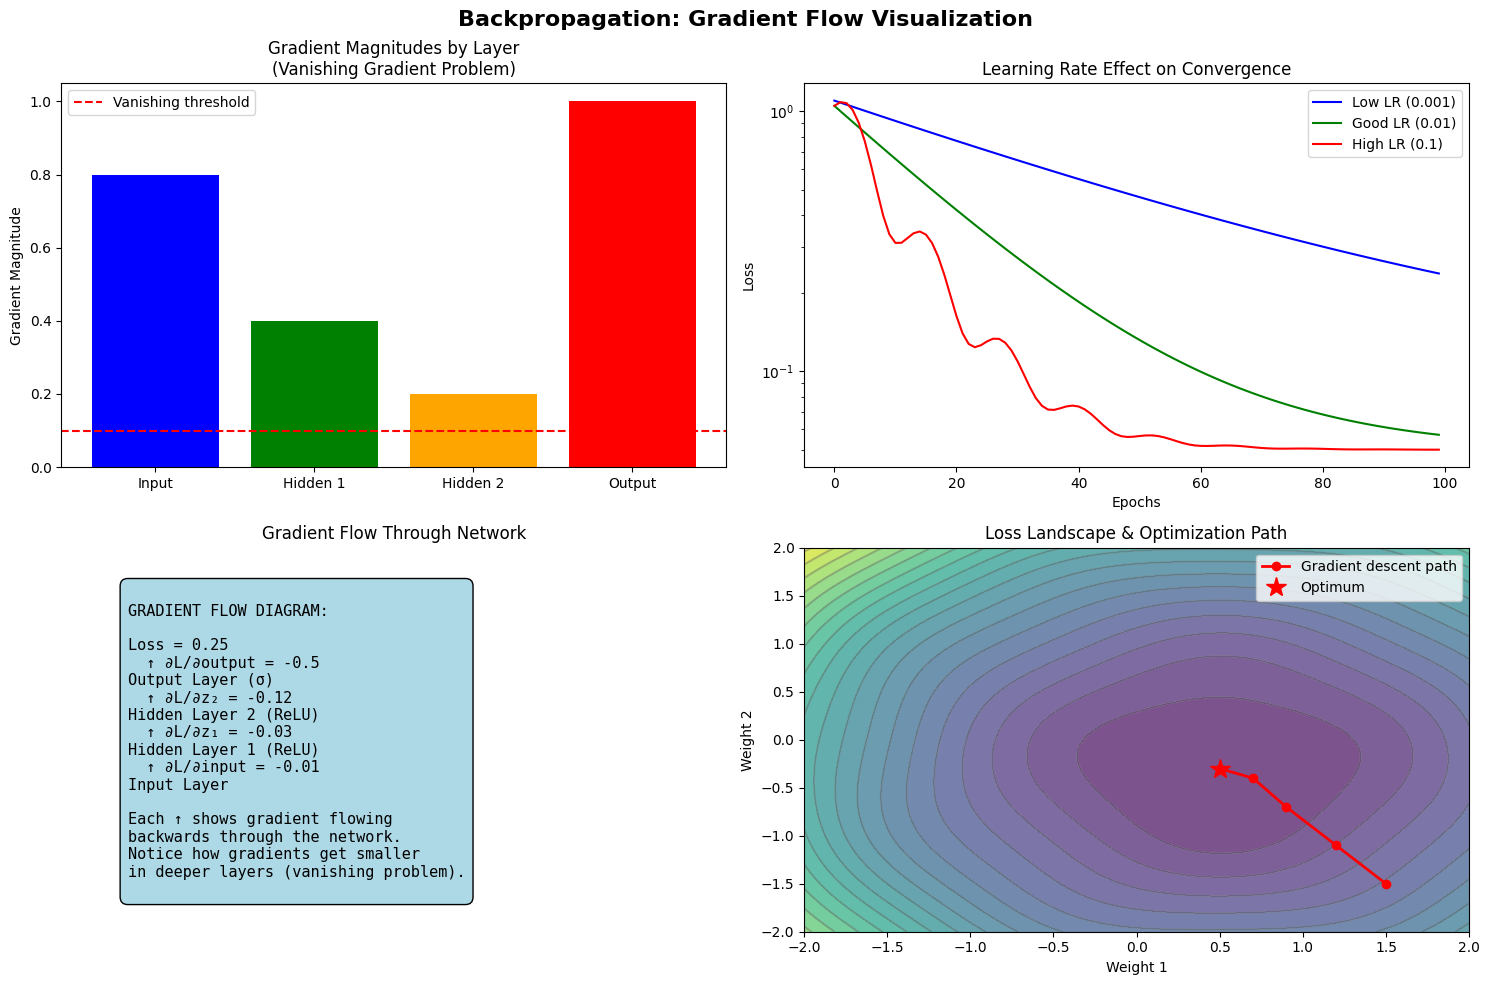

In [20]:
# Let's create a visualization of gradient flow

# Create a visualization of how gradients flow backwards
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Backpropagation: Gradient Flow Visualization', fontsize=16, fontweight='bold')

# Gradient magnitudes through layers
layers = ['Input', 'Hidden 1', 'Hidden 2', 'Output']
gradient_magnitudes = [0.8, 0.4, 0.2, 1.0]  # Typical vanishing pattern

axes[0, 0].bar(layers, gradient_magnitudes, color=['blue', 'green', 'orange', 'red'])
axes[0, 0].set_title('Gradient Magnitudes by Layer\n(Vanishing Gradient Problem)')
axes[0, 0].set_ylabel('Gradient Magnitude')
axes[0, 0].axhline(y=0.1, color='red', linestyle='--', label='Vanishing threshold')
axes[0, 0].legend()

# Learning rate effect on convergence
epochs = np.arange(0, 100)
loss_low_lr = 1.0 * np.exp(-0.02 * epochs) + 0.1  # Slow convergence
loss_good_lr = 1.0 * np.exp(-0.05 * epochs) + 0.05  # Good convergence
loss_high_lr = 1.0 * np.exp(-0.1 * epochs) * (1 + 0.3 * np.sin(0.5 * epochs)) + 0.05  # Oscillating

axes[0, 1].plot(epochs, loss_low_lr, label='Low LR (0.001)', color='blue')
axes[0, 1].plot(epochs, loss_good_lr, label='Good LR (0.01)', color='green')  
axes[0, 1].plot(epochs, loss_high_lr, label='High LR (0.1)', color='red')
axes[0, 1].set_title('Learning Rate Effect on Convergence')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].set_yscale('log')

# Network architecture diagram showing gradient flow
axes[1, 0].axis('off')
network_text = """
GRADIENT FLOW DIAGRAM:

Loss = 0.25
  ↑ ∂L/∂output = -0.5
Output Layer (σ)
  ↑ ∂L/∂z₂ = -0.12  
Hidden Layer 2 (ReLU)
  ↑ ∂L/∂z₁ = -0.03
Hidden Layer 1 (ReLU)  
  ↑ ∂L/∂input = -0.01
Input Layer

Each ↑ shows gradient flowing
backwards through the network.
Notice how gradients get smaller
in deeper layers (vanishing problem).
"""

axes[1, 0].text(0.1, 0.9, network_text, transform=axes[1, 0].transAxes, 
               fontsize=11, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue"))
axes[1, 0].set_title('Gradient Flow Through Network')

# Loss landscape visualization
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = (X - 0.5)**2 + (Y + 0.3)**2 + 0.2 * np.sin(3*X) * np.cos(3*Y)  # Complex loss surface

contour = axes[1, 1].contour(X, Y, Z, levels=20, colors='gray', alpha=0.5)
axes[1, 1].contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)

# Show gradient descent path
path_x = [1.5, 1.2, 0.9, 0.7, 0.5]  # Converging to optimum
path_y = [-1.5, -1.1, -0.7, -0.4, -0.3]
axes[1, 1].plot(path_x, path_y, 'r-o', linewidth=2, markersize=6, label='Gradient descent path')
axes[1, 1].plot(0.5, -0.3, 'r*', markersize=15, label='Optimum')
axes[1, 1].set_title('Loss Landscape & Optimization Path')
axes[1, 1].set_xlabel('Weight 1')
axes[1, 1].set_ylabel('Weight 2')
axes[1, 1].legend()

plt.tight_layout()
plt.show()



### Interpretation
The above graphs are artificially constructed pedagogical exemples with made up numbers. 

#### Graph 1: Gradient magnitude by layers
The bar chart shows how gradient magnitudes (its norms) change across network layers and represents the vanishing gradient (~ 0.1) problem in action: gradients start strong at output (1.0) but get progressively weaker in deeper layers.

#### Graph 2: Learning rate effect on convergence
It shows the loss curves over training epochs with different learning rates, and pictures the learning rate sensitivity in neural networks training, going from small to steady convergence to unstable solution.

#### Graph 4: Loss landscape & optimization path 
It presents the 3D contour plot with optimization trajectory for two weights.It shows complex optimization landscape that neural networks navigate in a non-convex surface with multiple local minima, and the gradient descent path from poor initialization to optimum.

### Beyond basic backpropagation:

1. BATCH GRADIENT DESCENT:
   • Process all data point before updating weights
   • More stable gradients, better GPU utilization
   • Batch size typically 32-256

2. STOCHASTIC GRADIENT DESCENT (SGD):
   • Update weights after each data point
   • Faster but noisier convergence
   • Good for very large datasets

3. MINI-BATCH GRADIENT DESCENT:
   • Best of both worlds: process small batches (16-64 data points)
   • Standard approach in modern deep learning
   • Balances stability with computational efficiency

4. ADAPTIVE OPTIMIZERS:
   • Adam: Adapts learning rate per parameter
   • RMSprop: Good for recurrent networks
   • AdaGrad: Reduces learning rate over time
   
5. AUTOMATIC DIFFERENTIATION:
   • Modern frameworks (PyTorch, TensorFlow) handle backprop automatically
   • Build network architectures, framework computes gradients
   • Enables rapid prototyping and experimentation

REGULARIZATION TECHNIQUES:
   • L1/L2 regularization: Add penalty terms to loss
   • Dropout: Randomly disable neurons during training
   • Batch normalization: Normalize inputs to each layer
   • Early stopping: Stop training when validation error increases